# Stock Dynamics

Stock values from IBM, GE, Procter & Gamble, Coca Cola and Boeing.

In [68]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
IBM = pd.read_csv('./data/IBMStock.csv')
GE = pd.read_csv('./data/GEStock.csv')
PG = pd.read_csv('./data/ProcterGambleStock.csv')
Coca = pd.read_csv('./data/CocaColaStock.csv')
Boeing = pd.read_csv('./data/BoeingStock.csv')

In [13]:
# Convert to date
IBM['Date'] = pd.to_datetime(IBM.Date, format='%m/%d/%y')
GE['Date'] = pd.to_datetime(GE.Date, format='%m/%d/%y')
PG['Date'] = pd.to_datetime(PG.Date, format='%m/%d/%y')
Coca['Date'] = pd.to_datetime(Coca.Date, format='%m/%d/%y')
Boeing['Date'] = pd.to_datetime(Boeing.Date, format='%m/%d/%y')

In [15]:
# Dataset size
# All dataset has the same size
print('Dataset size')
print(len(IBM))

Dataset size
480


In [16]:
# Earliest year
IBM.head()

,Date,StockPrice
0,1970-01-01,360.319048
1,1970-02-01,346.723684
2,1970-03-01,327.345714
3,1970-04-01,319.852727
4,1970-05-01,270.375238


In [17]:
# Latest year
IBM.tail()

,Date,StockPrice
475,2009-08-01,118.430952
476,2009-09-01,119.055714
477,2009-10-01,122.239546
478,2009-11-01,125.273500
479,2009-12-01,128.896364


In [18]:
# Mean stock price of IBM
IBM.describe()

,StockPrice
count,480.000000
mean,144.375030
std,87.822078
min,43.395000
25%,88.343929
50%,112.114595
75%,165.407284
max,438.901579


In [19]:
# Min stock price from GE
GE.describe()

,StockPrice
count,480.000000
mean,59.303504
std,23.992551
min,9.293636
25%,44.214405
50%,55.812045
75%,72.226201
max,156.843684


In [20]:
# Max Coca stock price
Coca.describe()

,StockPrice
count,480.000000
mean,60.029730
std,25.166291
min,30.057143
25%,42.755595
50%,51.436988
75%,69.617192
max,146.584286


In [21]:
# Median stock price from Boeing
Boeing.describe()

,StockPrice
count,480.000000
mean,46.592934
std,19.891837
min,12.736364
25%,34.642274
50%,44.883398
75%,57.214486
max,107.280000


In [22]:
# Standard deviation of PG
PG.describe()

,StockPrice
count,480.000000
mean,77.704516
std,18.194140
min,46.884545
25%,62.478663
50%,78.336077
75%,89.468375
max,149.620000


## Plot Coca Cola trend

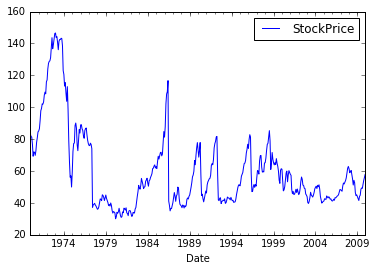

In [24]:
# Set index to date
Coca.set_index(['Date'], drop=False, inplace=True)
Coca.plot()

In [25]:
# Set index to date
PG.set_index(['Date'], drop=False, inplace=True)

In [43]:
# https://www.dezyre.com/data-science-in-python-tutorial/pandas-introductory-tutorial-part-3
Coca_PG = pd.concat([Coca, PG], axis=1,keys=['Coca', 'PG'])
Coca_PG.head()

Coca                    PG            
                 Date StockPrice       Date  StockPrice
Date                                                   
1970-01-01 1970-01-01  83.368095 1970-01-01  111.874286
1970-02-01 1970-02-01  81.591053 1970-02-01  111.453684
1970-03-01 1970-03-01  81.338095 1970-03-01  108.451429
1970-04-01 1970-04-01  76.805909 1970-04-01  106.288636
1970-05-01 1970-05-01  69.278571 1970-05-01   73.332857

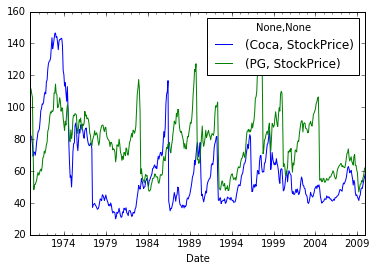

In [47]:
Coca_PG.plot()

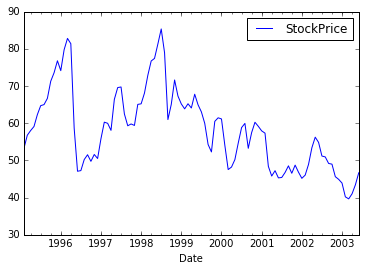

In [49]:
Coca[301:402].plot()

In [58]:
# Set index to date
IBM.set_index(['Date'], drop=False, inplace=True)
GE.set_index(['Date'], drop=False, inplace=True)
Boeing.set_index(['Date'], drop=False, inplace=True)

all_stock = pd.concat([Coca[301:402], PG[301:402], IBM[301:402], GE[301:402], Boeing[301:402]],
                      axis=1,keys=['Coca', 'PG', 'IBM', 'GE', 'Boeing'])

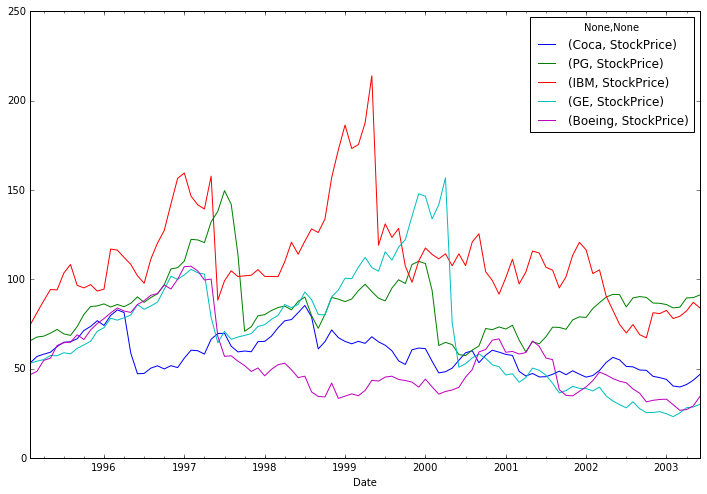

In [63]:
all_stock.plot(figsize=[12, 8])

In [71]:
# calculate the mean stock price of IBM, sorted by months
date_convert = pd.to_datetime(IBM.Date, format="%m/%d/%y")
IBM['Month'] = date_convert.map(lambda x: x.month)
IBM.pivot_table(values='StockPrice', columns='Month', aggfunc=np.mean)

Month
1     150.238423
2     152.693993
3     152.432690
4     152.116824
5     151.502194
6     139.090676
7     139.067018
8     140.145475
9     139.088527
10    137.346553
11    138.018682
12    140.759310
Name: StockPrice, dtype: float64

In [72]:
# calculate the mean stock price of GE, sorted by months
date_convert = pd.to_datetime(GE.Date, format="%m/%d/%y")
GE['Month'] = date_convert.map(lambda x: x.month)
GE.pivot_table(values='StockPrice', columns='Month', aggfunc=np.mean)

Month
1     62.045106
2     62.520805
3     63.150548
4     64.480092
5     60.871351
6     56.468439
7     56.733493
8     56.503149
9     56.239131
10    56.238968
11    57.288795
12    59.102174
Name: StockPrice, dtype: float64